In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-crime-analysis/murder.csv
/kaggle/input/indian-crime-analysis/accidents.xls
/kaggle/input/indian-crime-analysis/crimes.csv
/kaggle/input/indian-crime-analysis/abduction.xls
/kaggle/input/indian-crime-analysis/rape.csv


In [9]:
df_abduction = pd.read_excel(r'/kaggle/input/indian-crime-analysis/abduction.xls', sheet_name='Worksheet')


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [18]:
df_abduction.head(100)

,STATE/UT,YEAR,No. Of Cases In Which Offenders Were Known To The Victims,No. Of Cases In Which Offenders Were Parents / Close Family Members,No. Of Cases In Which Offenders Were Relatives,No. Of Cases In Which Offenders Were Neighbours,No. Of Cases In Which Offenders Were Other Known Persons
0,Andhra Pradesh,2013,1635,5,156,626,848
1,Arunachal Pradesh,2013,75,0,6,14,55
2,Assam,2013,1937,8,99,990,840
3,Bihar,2013,1022,6,26,578,412
4,Chhattisgarh,2013,1380,15,70,323,972
5,Goa,2013,86,6,7,9,64
6,Gujarat,2013,711,17,44,152,498
7,Haryana,2013,971,8,103,339,521
8,Himachal Pradesh,2013,250,9,3,21,217
9,Jammu & Kashmir,2013,351,0,0,103,248


In [12]:
pd.isnull(df_abduction).sum()

STATE/UT                                                               0
YEAR                                                                   0
No. Of Cases In Which Offenders Were Known To The Victims              0
No. Of Cases In Which Offenders Were Parents / Close Family Members    0
No. Of Cases In Which Offenders Were Relatives                         0
No. Of Cases In Which Offenders Were Neighbours                        0
No. Of Cases In Which Offenders Were Other Known Persons               0
dtype: int64

In [13]:
df_abduction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   STATE/UT                                                             35 non-null     object
 1   YEAR                                                                 35 non-null     int64 
 2   No. Of Cases In Which Offenders Were Known To The Victims            35 non-null     int64 
 3   No. Of Cases In Which Offenders Were Parents / Close Family Members  35 non-null     int64 
 4   No. Of Cases In Which Offenders Were Relatives                       35 non-null     int64 
 5   No. Of Cases In Which Offenders Were Neighbours                      35 non-null     int64 
 6   No. Of Cases In Which Offenders Were Other Known Persons             35 non-null     int64 
dtypes: int64(6), object(

In [14]:
df_abduction.describe()

,YEAR,No. Of Cases In Which Offenders Were Known To The Victims,No. Of Cases In Which Offenders Were Parents / Close Family Members,No. Of Cases In Which Offenders Were Relatives,No. Of Cases In Which Offenders Were Neighbours,No. Of Cases In Which Offenders Were Other Known Persons
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2013.0,908.771429,15.400000,66.142857,308.057143,519.171429
std,0.0,1094.576525,25.109408,79.460735,470.152975,610.055084
min,2013.0,2.000000,0.000000,0.000000,0.000000,2.000000
25%,2013.0,73.500000,0.000000,2.500000,15.000000,45.500000
50%,2013.0,422.000000,6.000000,26.000000,135.000000,248.000000
75%,2013.0,1286.500000,16.000000,101.000000,418.500000,827.000000
max,2013.0,4335.000000,108.000000,280.000000,2423.000000,2167.000000


It has a Symmetrical distribution i.e Mean ≈ Median ≈ Mode. It is a Bell-shaped (normal).

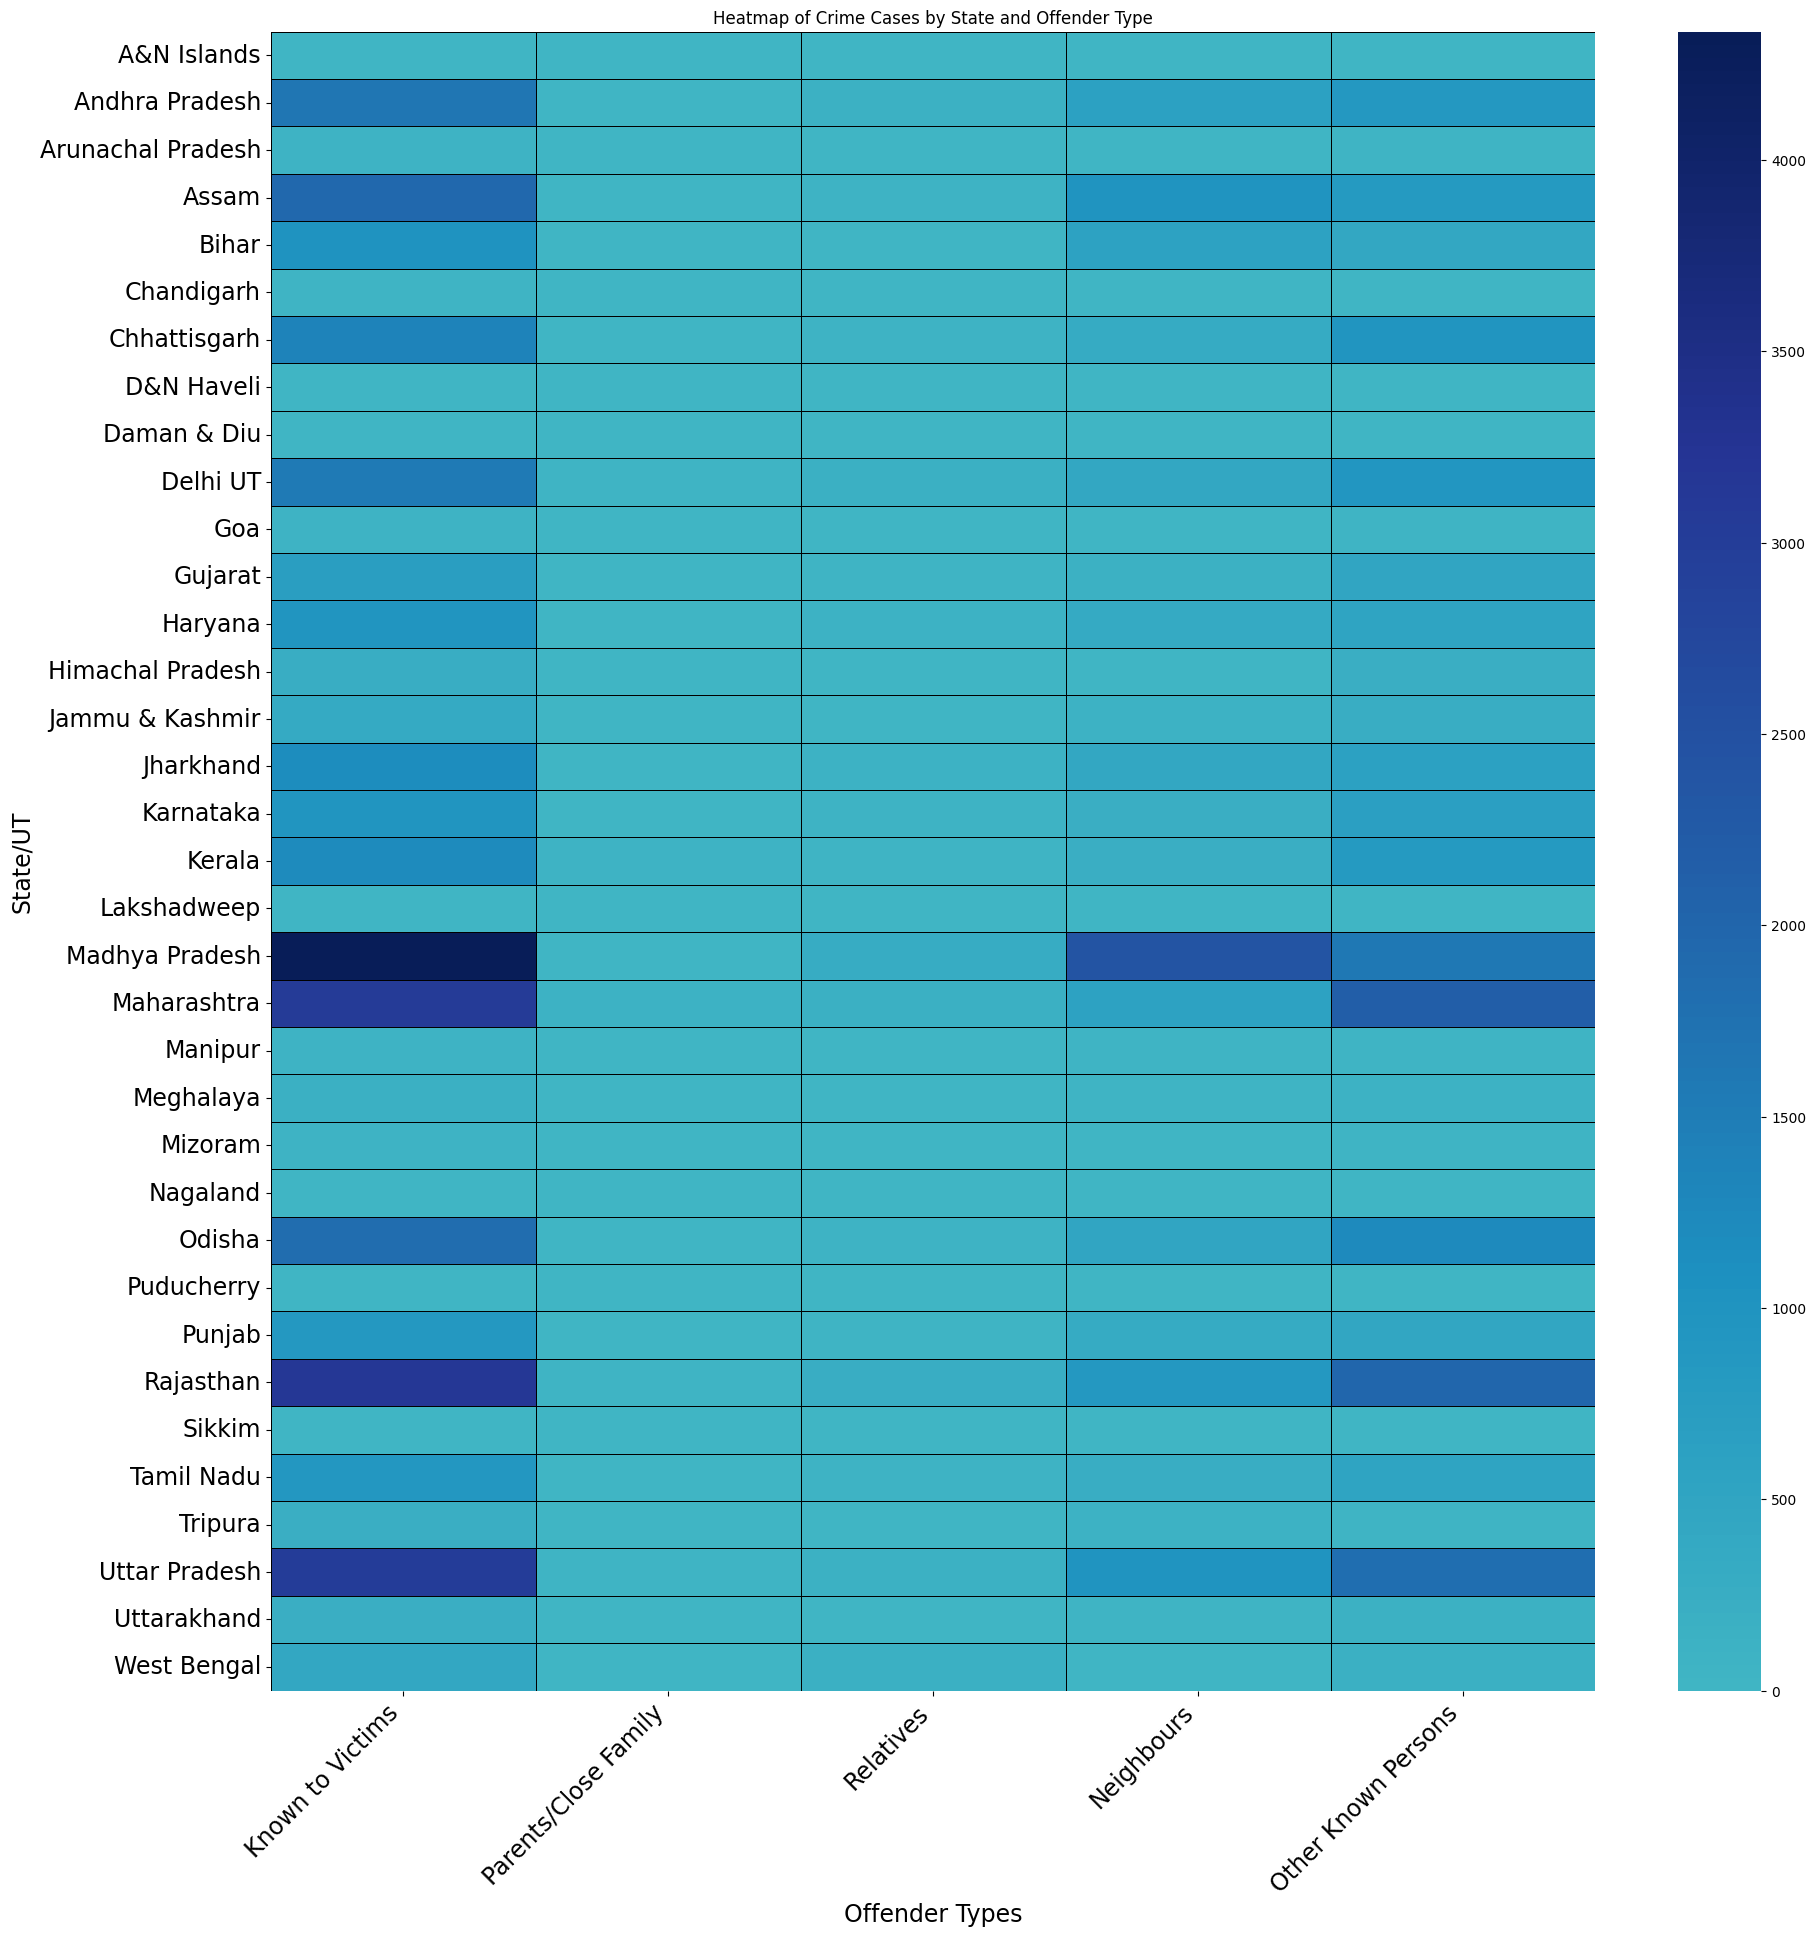

In [42]:
columns_to_plot = [
    "No. Of Cases In Which Offenders Were Known To The Victims",
    "No. Of Cases In Which Offenders Were Parents / Close Family Members",
    "No. Of Cases In Which Offenders Were Relatives",
    "No. Of Cases In Which Offenders Were Neighbours",
    "No. Of Cases In Which Offenders Were Other Known Persons"
]

df_abduction = df_abduction.rename(columns={
    "No. Of Cases In Which Offenders Were Known To The Victims": "Known to Victims",
    "No. Of Cases In Which Offenders Were Parents / Close Family Members": "Parents/Close Family",
    "No. Of Cases In Which Offenders Were Relatives": "Relatives",
    "No. Of Cases In Which Offenders Were Neighbours": "Neighbours",
    "No. Of Cases In Which Offenders Were Other Known Persons": "Other Known Persons"
})

columns_to_plot = [
    "Known to Victims",
    "Parents/Close Family",
    "Relatives",
    "Neighbours",
    "Other Known Persons"
]


# Aggregate data by STATE/UT
df_grouped = df_abduction.groupby("STATE/UT")[columns_to_plot].sum()

# Create the heatmap with square layout and spaced labels
plt.figure(figsize=(20, 20))  # Adjust the figure size to make it square
sns.heatmap(df_grouped, annot=False, fmt="d", cmap="YlGnBu", 
            center=0, linewidths=0.5, linecolor="black")

# Title and labels
plt.title("Heatmap of Crime Cases by State and Offender Type")
plt.xlabel("Offender Types", fontsize=17)
plt.ylabel("State/UT", fontsize=17)

# Rotate x-axis labels and adjust spacing
plt.xticks(rotation=45, ha="right", fontsize=17)
plt.yticks(rotation=0, fontsize=17)  # Optional: Keep y-axis labels horizontal

# Adjust layout and spacing
plt.tight_layout(pad=3)  # Increase padding between elements
plt.show()

In [43]:
df_accidents=pd.read_excel(r'/kaggle/input/indian-crime-analysis/accidents.xls', sheet_name='Worksheet')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [44]:
df_accidents.head(5)

,Name of City,Total number of Fatal Accidents - 2011,All Accidents - 2011,Persons Killed - 2011,Persons Injured - 2011,Total number of Fatal Accidents - 2012,All Accidents - 2012,Persons Killed - 2012,Persons Injured - 2012,Fatal Accidents - 2013,...,Injured - 2014,Severity - 2014,Fatal Accidents - 2015,Greviously Injured Accidents - 2015,Minor Accidents - 2015,Non-Injurey Accidents - 2015,Total Accidents - 2015,Killed - 2015,Injured - 2015,Severity - 2015
0,Agra,336.0,1299.0,632.0,1046.0,381.0,922.0,427.0,675.0,436.0,...,747.0,50.6,498.0,369.0,260.0,16.0,1143.0,474.0,650.0,41.5
1,Ahmedabad,222.0,2020.0,227.0,2036.0,245.0,1850.0,251.0,1845.0,227.0,...,1597.0,16.0,318.0,351.0,1168.0,0.0,1837.0,328.0,1722.0,17.9
2,Asansol-Durgapur,229.0,368.0,230.0,185.0,199.0,380.0,224.0,315.0,200.0,...,284.0,47.4,210.0,160.0,60.0,16.0,446.0,210.0,220.0,47.1
3,Aurangabad,161.0,719.0,173.0,744.0,178.0,715.0,192.0,649.0,150.0,...,578.0,30.4,153.0,297.0,147.0,57.0,654.0,170.0,670.0,26.0
4,Bengaluru,689.0,6031.0,720.0,4952.0,707.0,5508.0,725.0,4527.0,733.0,...,4098.0,14.6,708.0,1331.0,1899.0,896.0,4834.0,713.0,4057.0,14.7


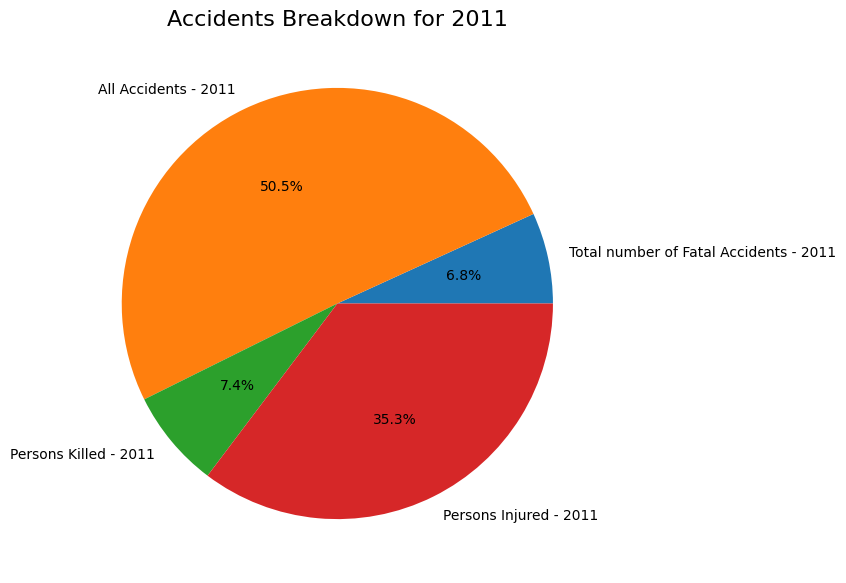

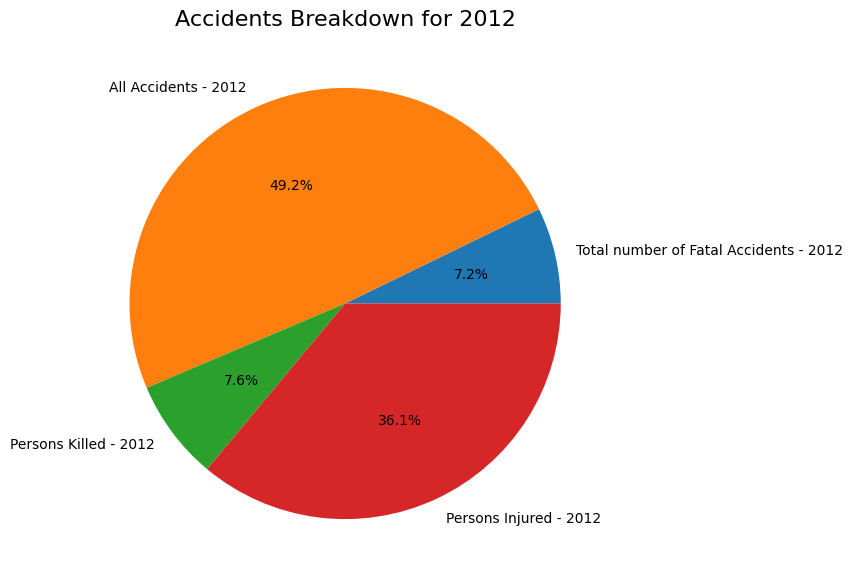

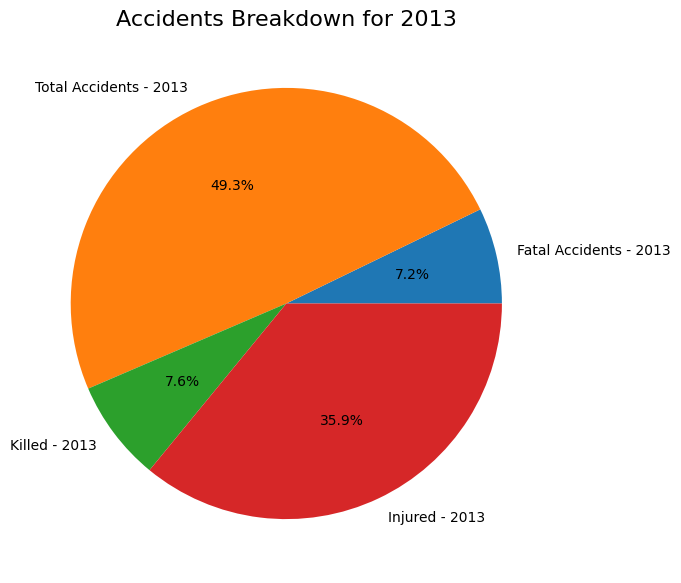

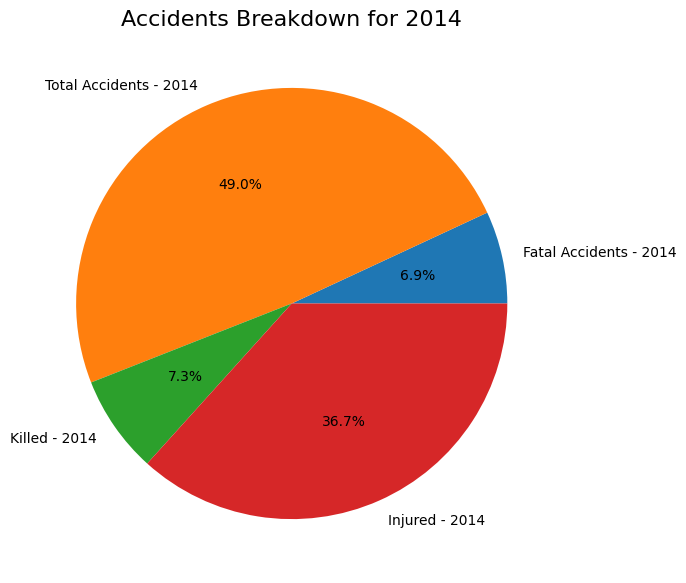

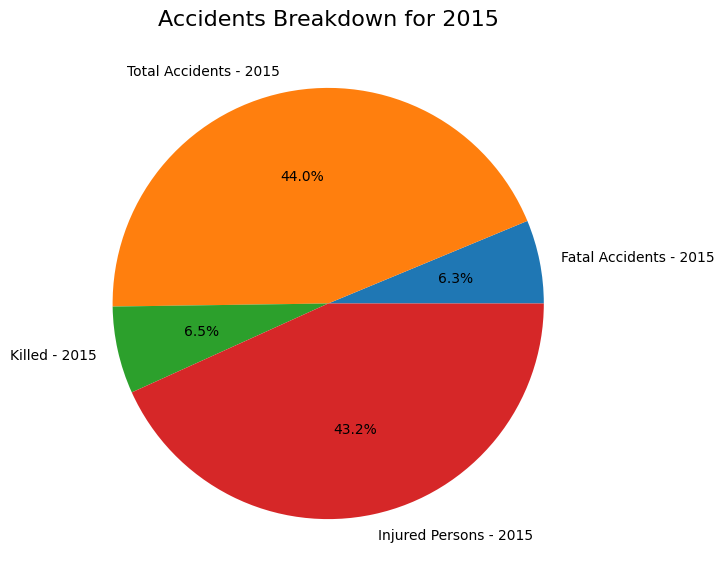

In [56]:
df_accidents['Injured Persons - 2015'] = df_accidents['Greviously Injured Accidents - 2015'] + df_accidents['Injured - 2015']
# List of columns to plot
columns_2011 = [
    "Total number of Fatal Accidents - 2011", 
    "All Accidents - 2011",
    "Persons Killed - 2011",
    "Persons Injured - 2011"
]
columns_2012 = [
    "Total number of Fatal Accidents - 2012", 
    "All Accidents - 2012",
    "Persons Killed - 2012",
    "Persons Injured - 2012"
]
columns_2013 = [
    "Fatal Accidents - 2013", 
    "Total Accidents - 2013",
    "Killed - 2013",
    "Injured - 2013"
]
columns_2014 = [
    "Fatal Accidents - 2014", 
    "Total Accidents - 2014",
    "Killed - 2014",
    "Injured - 2014"
]
columns_2015 = [
    "Fatal Accidents - 2015", 
    'Total Accidents - 2015',
    "Killed - 2015",
    'Injured Persons - 2015'
]

# Group by City and Year, then sum the accident columns for each group
df_grouped = df_accidents.groupby(['Name of City']).sum()

# Define the function to plot pie charts for each year
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    data.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 7), legend=False)
    plt.title(title, fontsize=16)
    plt.ylabel('')  # Hide y-axis label
    plt.show()

# Plot pie charts for each year
plot_pie_chart(df_grouped[columns_2011].sum(), "Accidents Breakdown for 2011")
plot_pie_chart(df_grouped[columns_2012].sum(), "Accidents Breakdown for 2012")
plot_pie_chart(df_grouped[columns_2013].sum(), "Accidents Breakdown for 2013")
plot_pie_chart(df_grouped[columns_2014].sum(), "Accidents Breakdown for 2014")
plot_pie_chart(df_grouped[columns_2015].sum(), "Accidents Breakdown for 2015")


In [48]:
print(df_accidents.columns)

Index(['Name of City', 'Total number of Fatal Accidents - 2011',
       'All Accidents - 2011', 'Persons Killed - 2011',
       'Persons Injured - 2011', 'Total number of Fatal Accidents - 2012',
       'All Accidents - 2012', 'Persons Killed - 2012',
       'Persons Injured - 2012', 'Fatal Accidents - 2013',
       'Total Accidents - 2013', 'Killed - 2013', 'Injured - 2013',
       'Severity - 2013', 'Fatal Accidents - 2014',
       'Greviously Injured Accidents - 2014', 'Minor Accidents - 2014',
       'Non-Injurey Accidents - 2014', 'Total Accidents - 2014',
       'Killed - 2014', 'Injured - 2014', 'Severity - 2014',
       'Fatal Accidents - 2015', 'Greviously Injured Accidents - 2015',
       'Minor Accidents - 2015', 'Non-Injurey Accidents - 2015',
       'Total Accidents - 2015', 'Killed - 2015', 'Injured - 2015',
       'Severity - 2015'],
      dtype='object')


In [54]:
df_accidents.head()

,Name of City,Total number of Fatal Accidents - 2011,All Accidents - 2011,Persons Killed - 2011,Persons Injured - 2011,Total number of Fatal Accidents - 2012,All Accidents - 2012,Persons Killed - 2012,Persons Injured - 2012,Fatal Accidents - 2013,...,Severity - 2014,Fatal Accidents - 2015,Greviously Injured Accidents - 2015,Minor Accidents - 2015,Non-Injurey Accidents - 2015,Total Accidents - 2015,Killed - 2015,Injured - 2015,Severity - 2015,Injured Persons - 2015
0,Agra,336.0,1299.0,632.0,1046.0,381.0,922.0,427.0,675.0,436.0,...,50.6,498.0,369.0,260.0,16.0,1143.0,474.0,650.0,41.5,1019.0
1,Ahmedabad,222.0,2020.0,227.0,2036.0,245.0,1850.0,251.0,1845.0,227.0,...,16.0,318.0,351.0,1168.0,0.0,1837.0,328.0,1722.0,17.9,2073.0
2,Asansol-Durgapur,229.0,368.0,230.0,185.0,199.0,380.0,224.0,315.0,200.0,...,47.4,210.0,160.0,60.0,16.0,446.0,210.0,220.0,47.1,380.0
3,Aurangabad,161.0,719.0,173.0,744.0,178.0,715.0,192.0,649.0,150.0,...,30.4,153.0,297.0,147.0,57.0,654.0,170.0,670.0,26.0,967.0
4,Bengaluru,689.0,6031.0,720.0,4952.0,707.0,5508.0,725.0,4527.0,733.0,...,14.6,708.0,1331.0,1899.0,896.0,4834.0,713.0,4057.0,14.7,5388.0


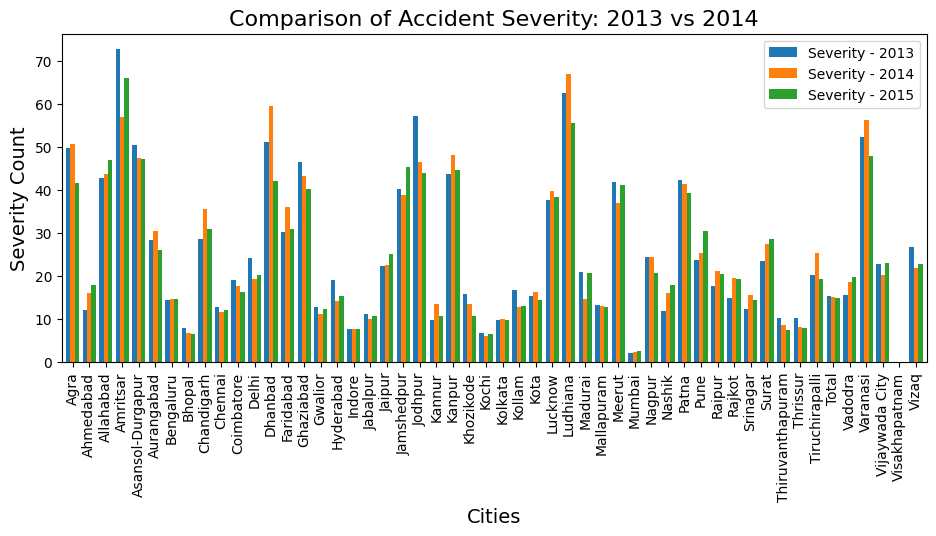

In [58]:

severity_col=["Severity - 2013", "Severity - 2014","Severity - 2015"]


df_grouped_severity = df_accidents.groupby(['Name of City'])[severity_col].sum()
df_grouped_severity.plot(kind='bar', figsize=(10, 6), width=0.8)

# Title and labels
plt.title("Comparison of Accident Severity: 2013 vs 2014", fontsize=16)
plt.xlabel("Cities", fontsize=14)
plt.ylabel("Severity Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="center")

# Show the plot
plt.tight_layout(pad=3)
plt.show()


In [59]:
df_crimes=pd.read_csv(r'/kaggle/input/indian-crime-analysis/crimes.csv')

In [60]:
df_crimes.head()

,STATE/UT,YEAR,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339


In [62]:
pd.isnull(df_crimes).sum()

STATE/UT                       0
YEAR                           0
Pupose                         0
Total No. of cases reported    0
Male upto 10 years             0
Female upto 10 years           0
Male 10-15 years               0
Female 10-15 years             0
Male 15-18 years               0
Female 15-18 years             0
Male 18-30 years               0
Female 18-30 years             0
Male 30-50 years               0
Female 30-50 years             0
Male above 50 years            0
Female above 50 years          0
Total Male                     0
Total Female                   0
Grand Total                    0
dtype: int64

In [63]:
df_crimes['Female under 18'] = df_crimes['Female upto 10 years']+df_crimes['Female 10-15 years']+df_crimes['Female 15-18 years']

In [64]:
df_crimes['Male under 18'] = df_crimes['Male upto 10 years']+df_crimes['Male 10-15 years']+df_crimes['Male 15-18 years']

In [65]:
df_crimes = df_crimes.rename(columns={
   "Male above 50 years": "Male 50+",           
"Female above 50 years" : "Female 50+"
})

In [71]:
print(df_crimes.columns)

Index(['STATE/UT', 'YEAR', 'Pupose', 'Total No. of cases reported',
       'Male 18-30 years', 'Female 18-30 years', 'Male 30-50 years',
       'Female 30-50 years', 'Male 50+', 'Female 50+', 'Total Male',
       'Total Female', 'Grand Total', 'Female under 18', 'Male under 18'],
      dtype='object')


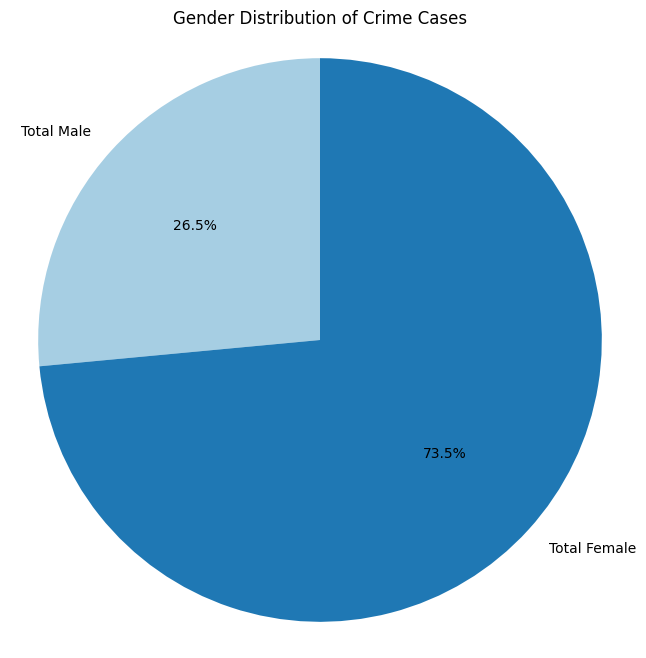

In [72]:
gender_counts = df_crimes[['Total Male', 'Total Female']].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Gender Distribution of Crime Cases')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

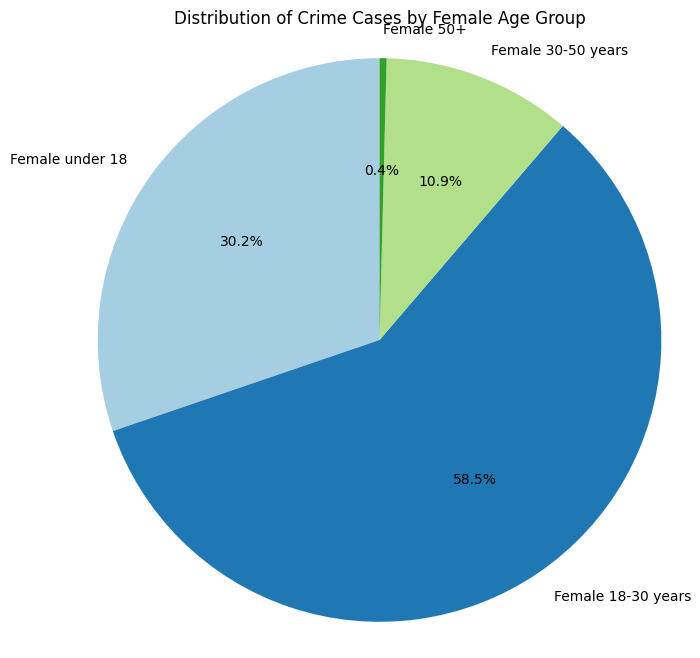

In [73]:
female_age_groups = df_crimes[['Female under 18', 'Female 18-30 years', 'Female 30-50 years', 'Female 50+']].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(female_age_groups, labels=female_age_groups.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Crime Cases by Female Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

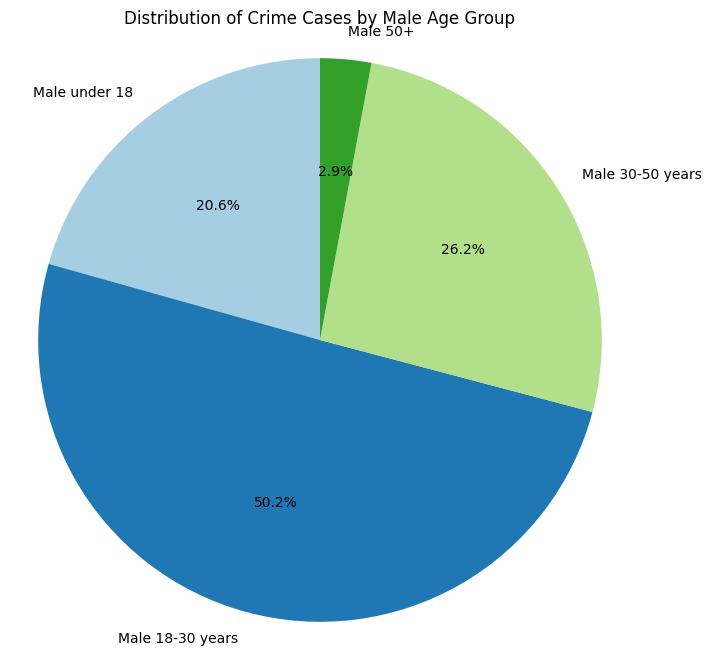

In [74]:
male_age_groups = df_crimes[['Male under 18', 'Male 18-30 years', 'Male 30-50 years', 'Male 50+']].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(male_age_groups, labels=male_age_groups.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Crime Cases by Male Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [2]:
df_murder=pd.read_csv(r'/kaggle/input/indian-crime-analysis/murder.csv')

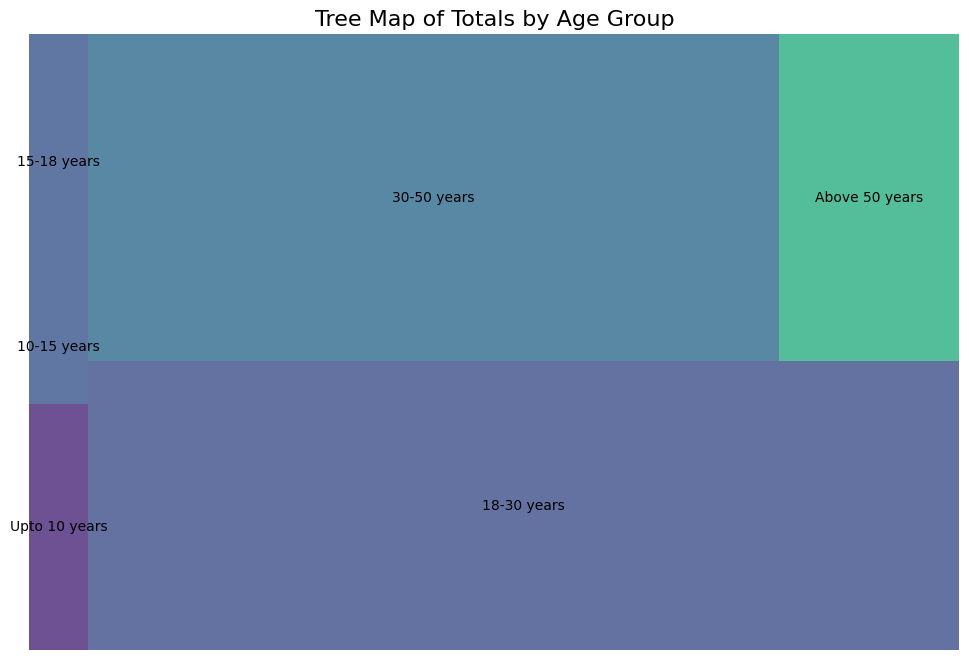

In [6]:
state_totals = df_murder.groupby('STATE/UT')['Total'].sum().sort_values(ascending=False)
age_group_totals = df_murder[['Upto 10 years', '10-15 years', '15-18 years',
                         '18-30 years', '30-50 years', 'Above 50 years']].sum()

# Remove zero values to avoid ZeroDivisionError
state_totals = state_totals[state_totals > 0]
age_group_totals = age_group_totals[age_group_totals > 0]

# Function to create a tree map
def plot_treemap(values, labels, title):
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=values, label=labels, alpha=0.8, text_kwargs={'fontsize': 10})
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()



# Tree map for age group totals
plot_treemap(age_group_totals.values, age_group_totals.index, "Tree Map of Totals by Age Group")

<Figure size 1400x800 with 0 Axes>

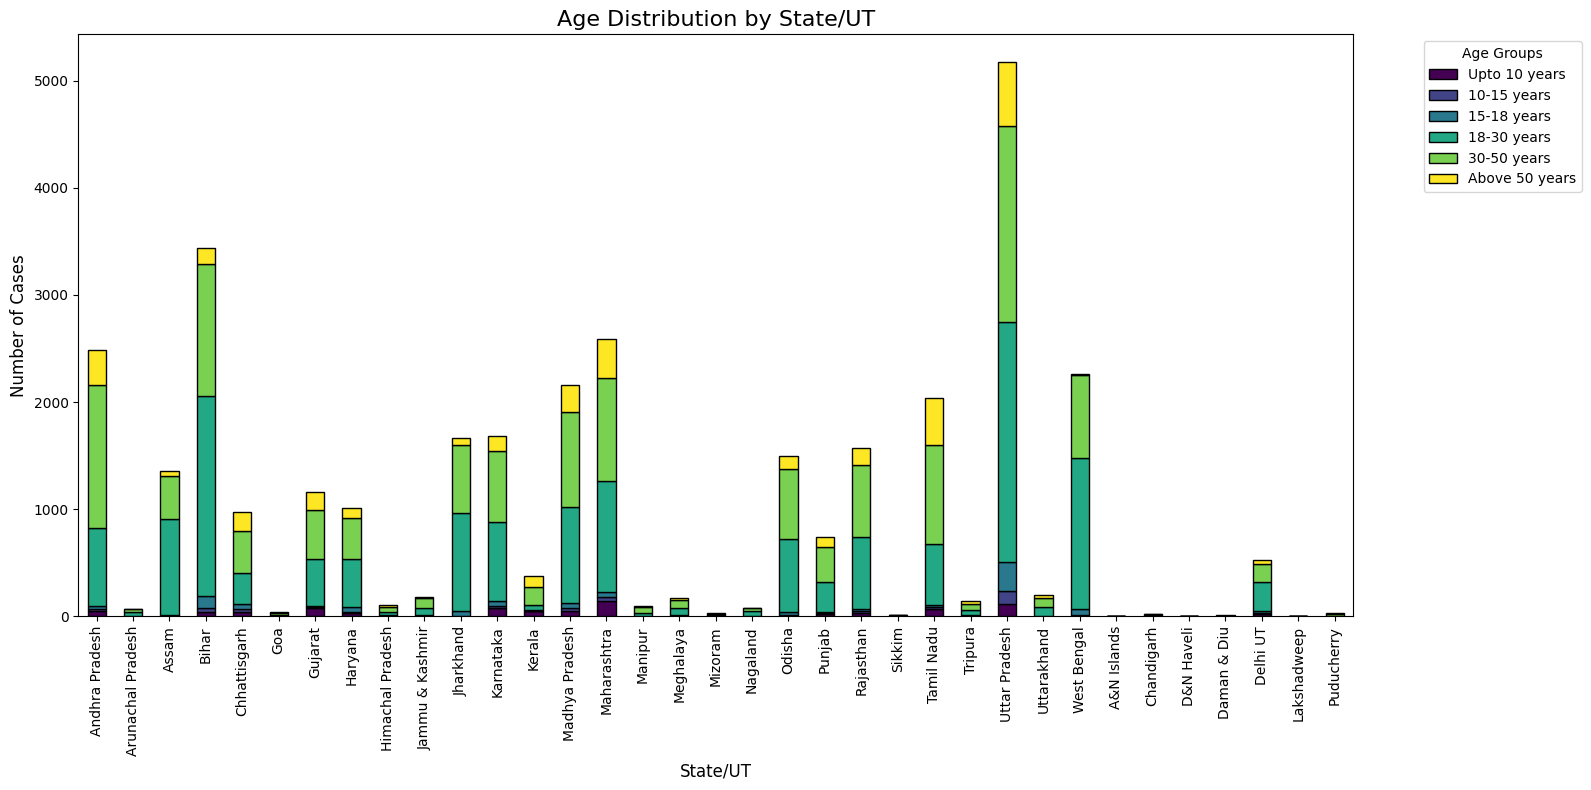

In [9]:
total_data = df_murder[df_murder['GENDER'] == 'Total']

# Extract relevant columns for plotting
age_columns = ['Upto 10 years', '10-15 years', '15-18 years', '18-30 years', '30-50 years', 'Above 50 years']
age_distribution = total_data.set_index('STATE/UT')[age_columns]

# Create a stacked bar graph for age distribution by state
plt.figure(figsize=(14, 8))
age_distribution.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis', edgecolor='black')

plt.title("Age Distribution by State/UT", fontsize=16)
plt.ylabel("Number of Cases", fontsize=12)
plt.xlabel("State/UT", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title="Age Groups", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
df_rape=pd.read_csv(r'/kaggle/input/indian-crime-analysis/rape.csv')

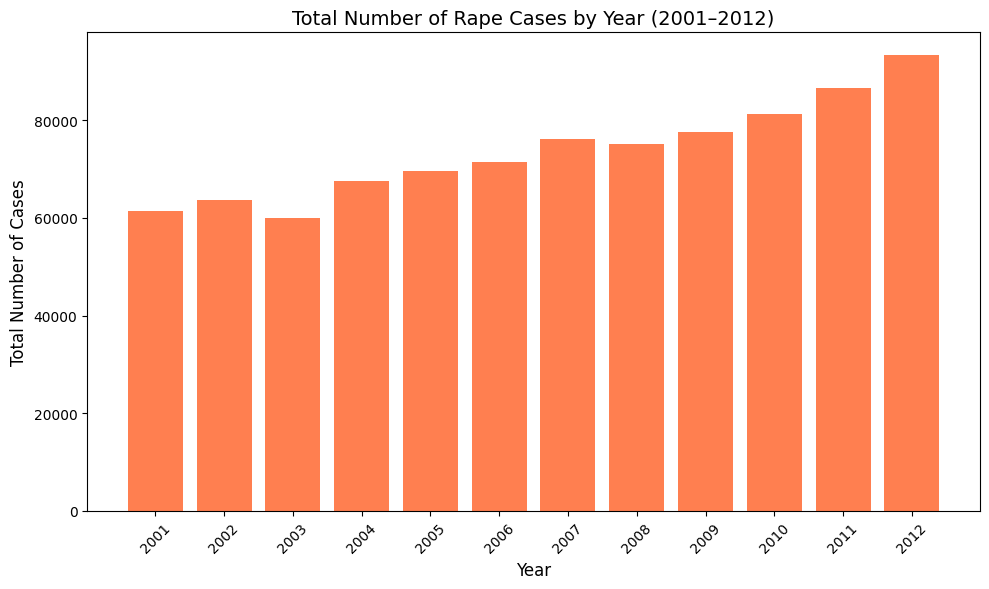

In [11]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'RAPE']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of Rape Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

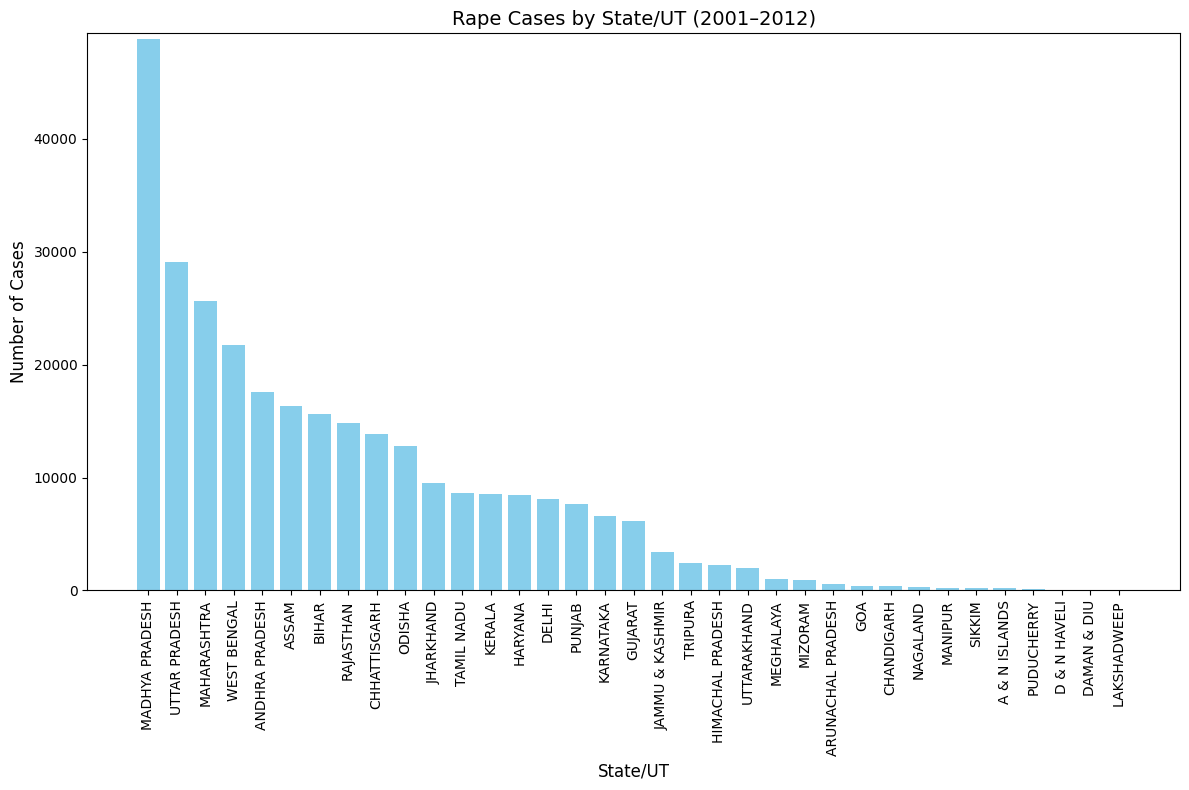

In [13]:
# Filter the data for rows where 'CRIME HEAD' is 'RAPE'
rape_data = df_rape[df_rape['CRIME HEAD'] == 'RAPE']

# Remove rows where 'STATE/UT' contains 'TOTAL'
rape_data = rape_data[~rape_data['STATE/UT'].str.contains("TOTAL", case=False)]

# Calculate the total number of rape cases for each state/UT across all years
rape_data['Total'] = rape_data.iloc[:, 2:].sum(axis=1)

# Sort the data by total cases for better visualization
rape_data_sorted = rape_data.sort_values('Total', ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(rape_data_sorted['STATE/UT'], rape_data_sorted['Total'], color='skyblue')

# Adjust the Y-axis to dynamically fit the data
plt.ylim(0, rape_data_sorted['Total'].max() + 500)

plt.xticks(rotation=90)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Rape Cases by State/UT (2001–2012)', fontsize=14)
plt.tight_layout()
plt.show()

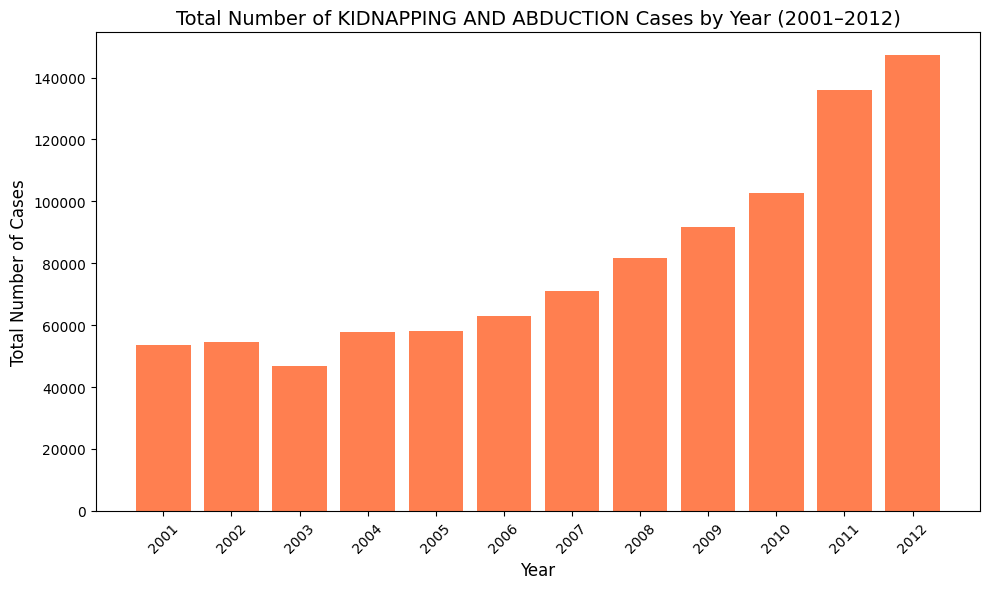

In [15]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'KIDNAPPING AND ABDUCTION']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of KIDNAPPING AND ABDUCTION Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

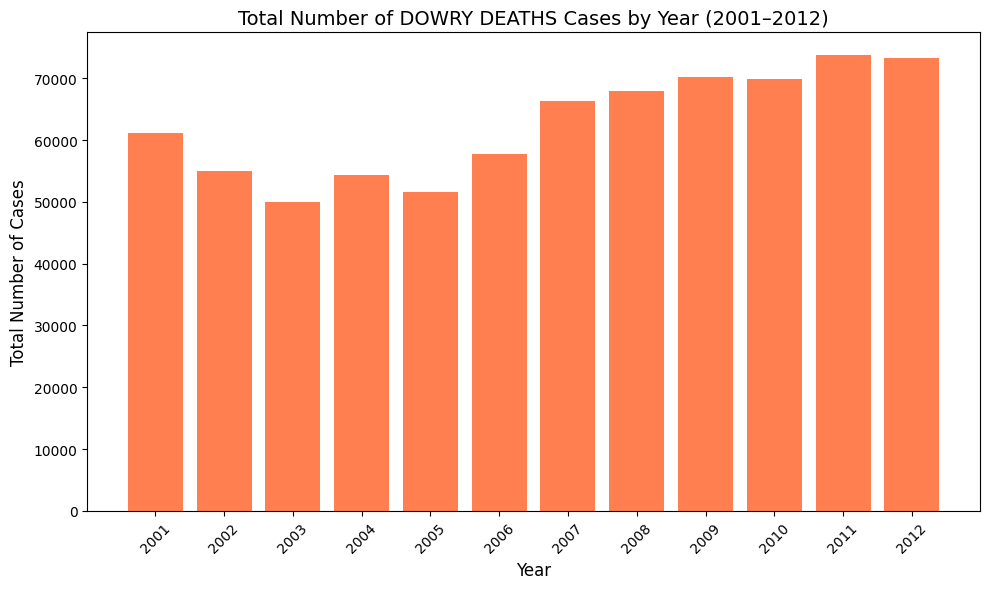

In [16]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'DOWRY DEATHS']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of DOWRY DEATHS Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

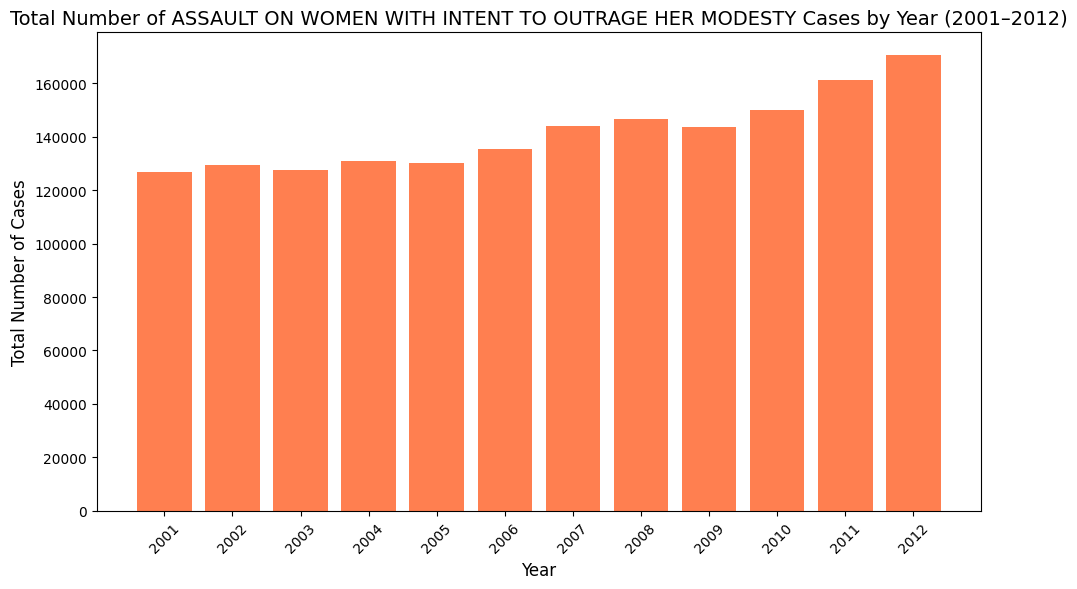

In [17]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

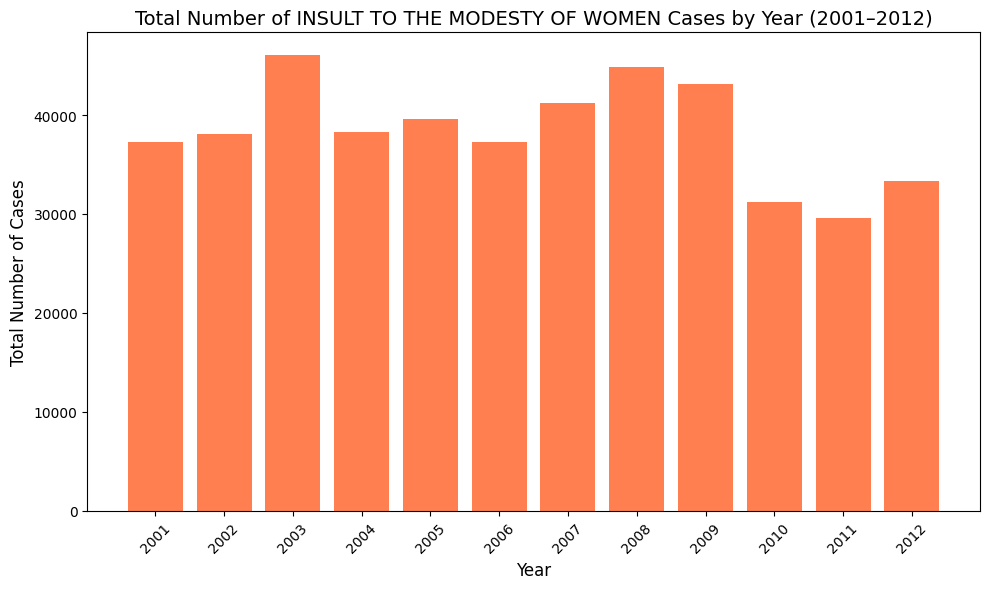

In [18]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'INSULT TO THE MODESTY OF WOMEN']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of INSULT TO THE MODESTY OF WOMEN Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

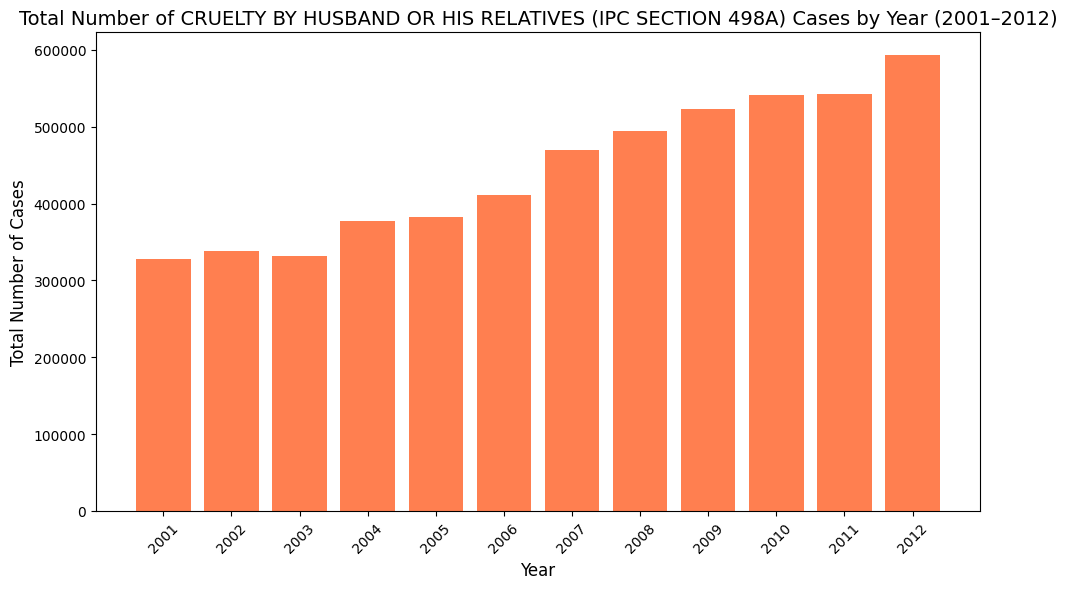

In [19]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'CRUELTY BY HUSBAND OR HIS RELATIVES (IPC SECTION 498A)']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of CRUELTY BY HUSBAND OR HIS RELATIVES (IPC SECTION 498A) Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

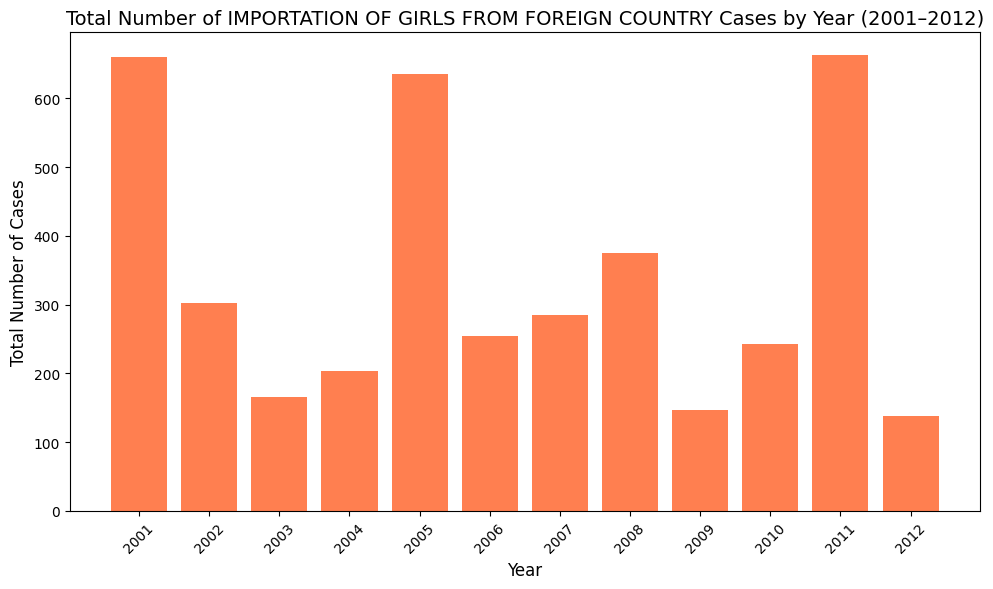

In [20]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRY']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of IMPORTATION OF GIRLS FROM FOREIGN COUNTRY Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

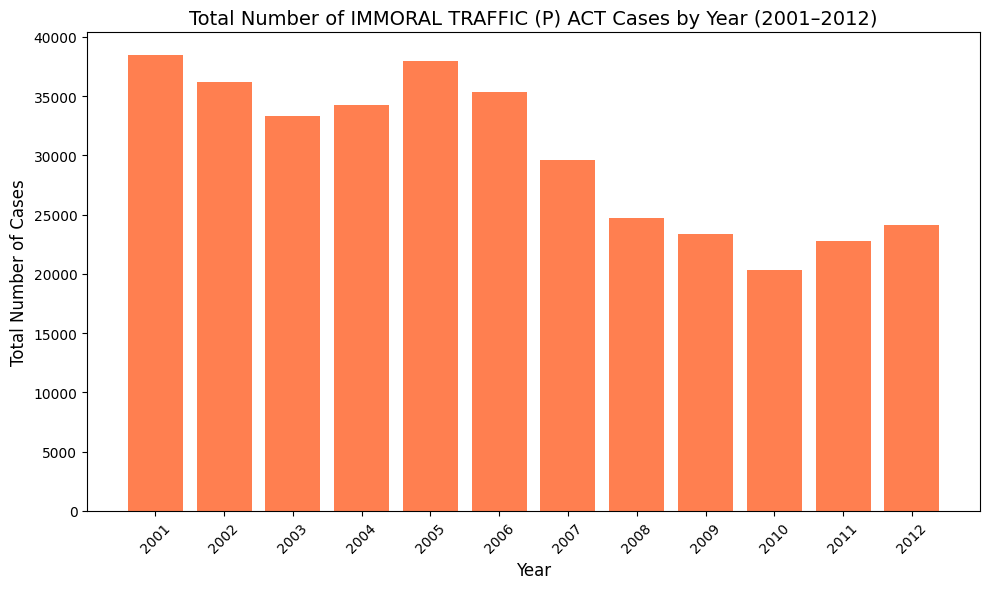

In [21]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'IMMORAL TRAFFIC (P) ACT']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of IMMORAL TRAFFIC (P) ACT Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

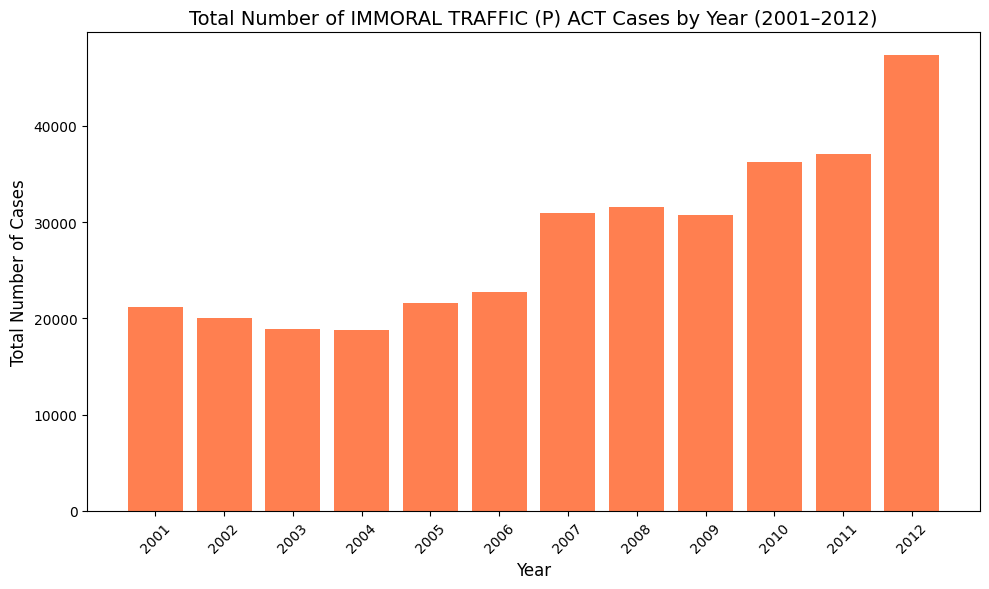

In [22]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'DOWRY PROHIBITION ACT']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of IMMORAL TRAFFIC (P) ACT Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

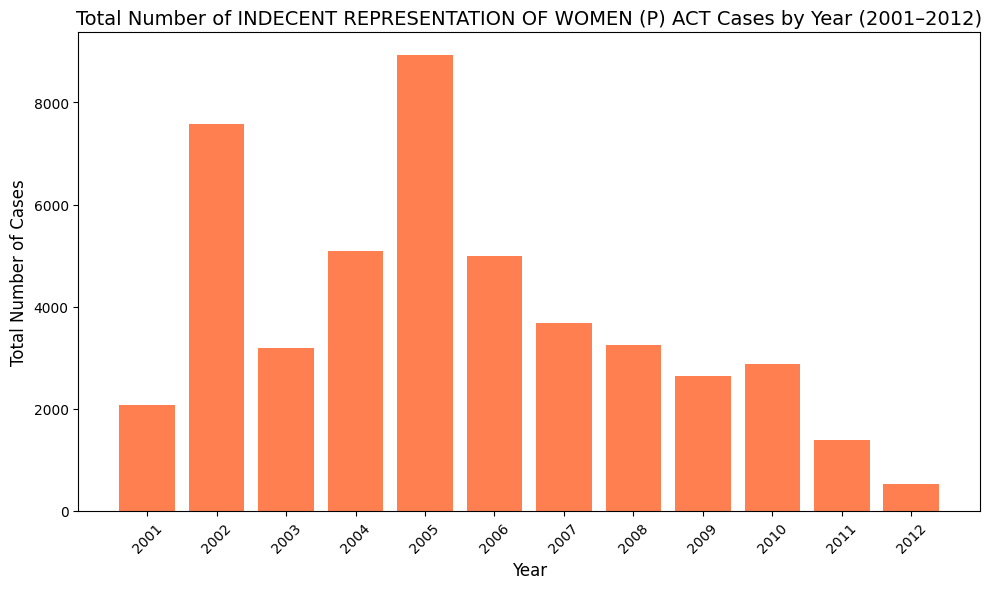

In [23]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'INDECENT REPRESENTATION OF WOMEN (P) ACT']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of INDECENT REPRESENTATION OF WOMEN (P) ACT Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

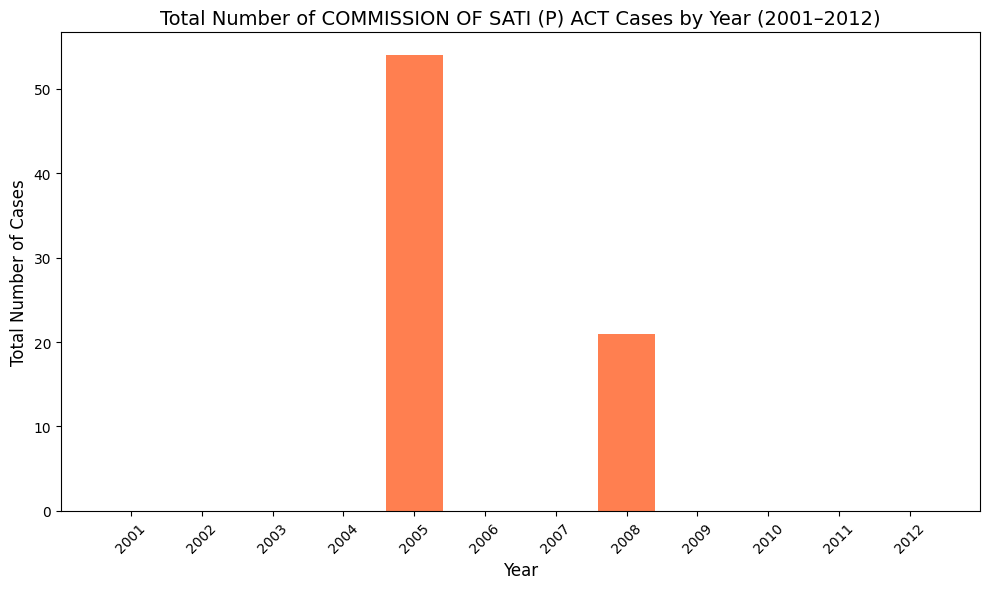

In [24]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'COMMISSION OF SATI (P) ACT']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of COMMISSION OF SATI (P) ACT Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

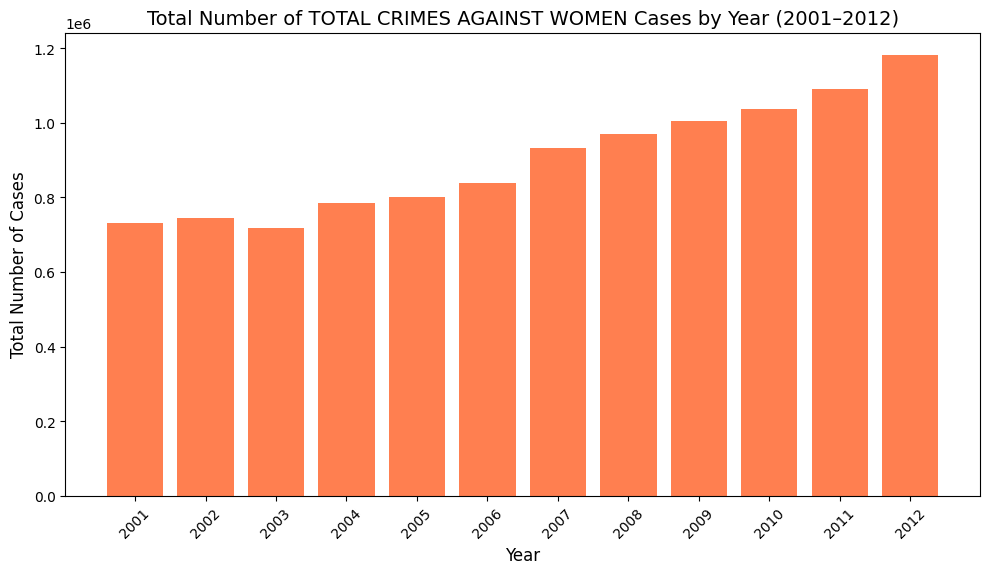

In [25]:
rape_data = df_rape[df_rape['CRIME HEAD'] == 'TOTAL CRIMES AGAINST WOMEN']

# Calculate the total number of rape cases for each year across all states/UTs
total_by_year = rape_data.iloc[:, 2:].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_by_year.index, total_by_year.values, color='coral')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.title('Total Number of TOTAL CRIMES AGAINST WOMEN Cases by Year (2001–2012)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()